Note: you may need to restart the kernel to use updated packages.
PC1 explains: 15.71%
PC2 explains: 13.57%



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


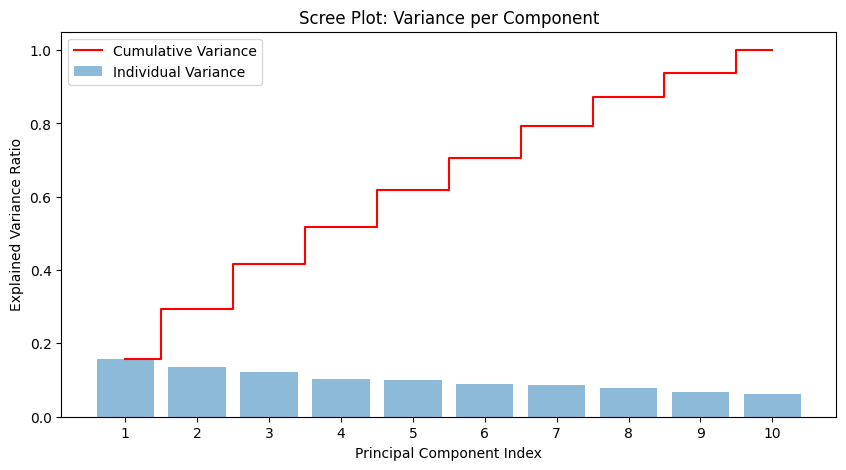

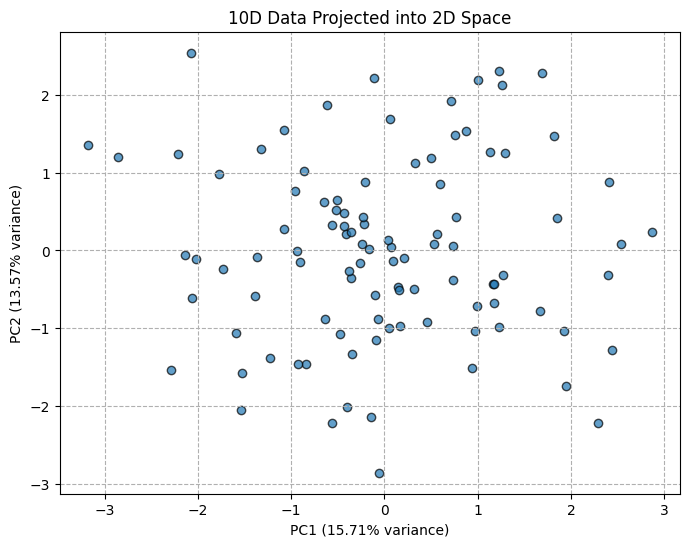

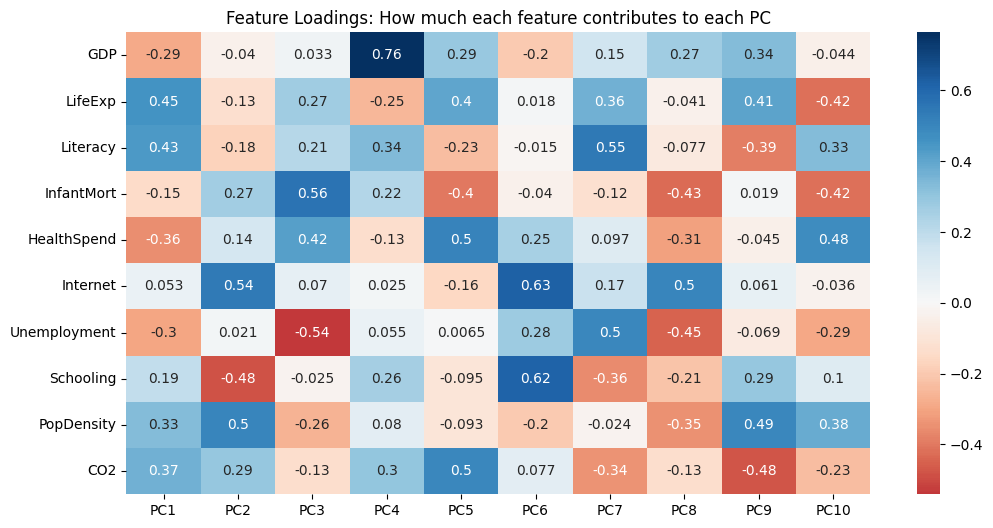

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Create a dummy dataset with 10 features
np.random.seed(42)
data = np.random.rand(100, 10) 
columns = ['GDP', 'LifeExp', 'Literacy', 'InfantMort', 'HealthSpend', 
           'Internet', 'Unemployment', 'Schooling', 'PopDensity', 'CO2']
df = pd.DataFrame(data, columns=columns)

# 2. Standardize (Crucial! PCA is sensitive to scale)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 3. Apply PCA
pca = PCA(n_components=10)
pca_data = pca.fit_transform(df_scaled)

# 4. Look at the "Explained Variance"
# This tells us how much info each PC holds
explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains: {explained_variance[0]:.2%}")
print(f"PC2 explains: {explained_variance[1]:.2%}")


# Assuming 'pca' and 'pca_data' are from your previous code
# --- Graph 1: Scree Plot ---
plt.figure(figsize=(10, 5))
exp_var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(exp_var_ratio)

plt.bar(range(1, 11), exp_var_ratio, alpha=0.5, label='Individual Variance')
plt.step(range(1, 11), cum_var_ratio, where='mid', label='Cumulative Variance', color='red')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Scree Plot: Variance per Component')
plt.xticks(range(1, 11))
plt.legend()
plt.savefig('scree_plot.png')

# --- Graph 2: 2D Projection ---
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(10)])
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel(f'PC1 ({exp_var_ratio[0]:.2%} variance)')
plt.ylabel(f'PC2 ({exp_var_ratio[1]:.2%} variance)')
plt.title('10D Data Projected into 2D Space')
plt.grid(True, linestyle='--')
plt.savefig('pca_2d_projection.png')

# --- Graph 3: Loadings Heatmap ---
# Components_ contains the weights for each feature
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(10)], 
                        index=columns)

plt.figure(figsize=(12, 6))
sns.heatmap(loadings, annot=True, cmap='RdBu', center=0)
plt.title('Feature Loadings: How much each feature contributes to each PC')
plt.savefig('pca_loadings_heatmap.png')